In [20]:
# Import dependencies and setup

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [21]:
# Load and preview dataset

raw_df = pd.read_csv('../Resources/aus_ev_sales_ML.csv', index_col='Year', parse_dates=True)
raw_df

,EV_PHEV
Year,
2011-01-01,49
2012-01-01,253
2013-01-01,293
2014-01-01,1322
2015-01-01,1771
2016-01-01,1369
2017-01-01,2287
2018-01-01,2216
2019-01-01,6718


In [22]:
# Prepare for Prophet
# Reset index

df = raw_df.reset_index()
df.head()

,Year,EV_PHEV
0,2011-01-01,49
1,2012-01-01,253
2,2013-01-01,293
3,2014-01-01,1322
4,2015-01-01,1771


In [23]:
# Rename 'Year' and 'EV_PHEV' to 'ds' and 'y', respectively

df = df.rename(columns={'Year':'ds', 'EV_PHEV':'y'})
df.head()

,ds,y
0,2011-01-01,49
1,2012-01-01,253
2,2013-01-01,293
3,2014-01-01,1322
4,2015-01-01,1771


<AxesSubplot:xlabel='ds'>

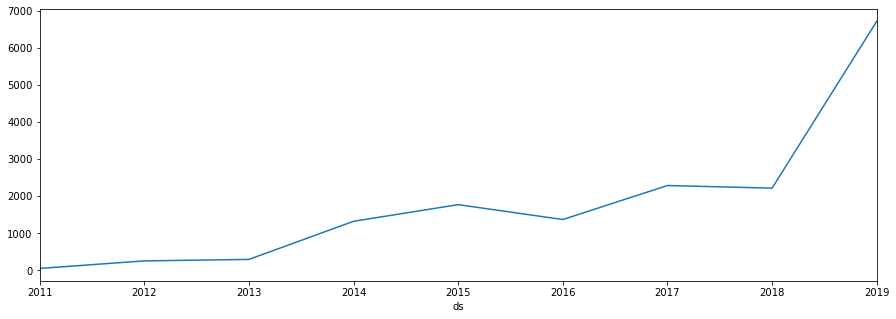

In [24]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [25]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

,ds,y
4,2015-01-01,7.479300
5,2016-01-01,7.221836
6,2017-01-01,7.734996
7,2018-01-01,7.703459
8,2019-01-01,8.812546


<AxesSubplot:xlabel='ds'>

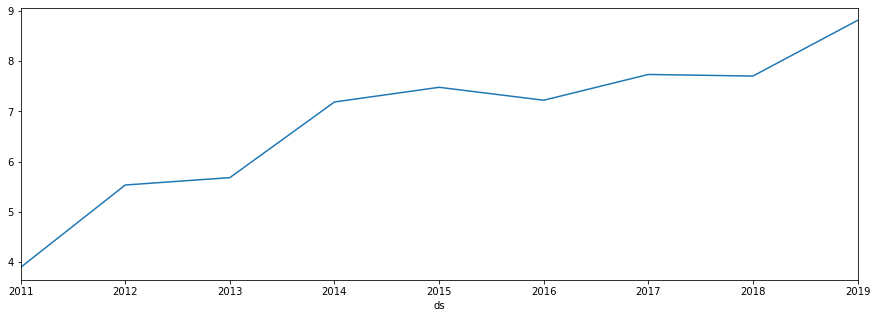

In [26]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [27]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


In [28]:
# Add future dates to model (5 years / 60 months)

future = model.make_future_dataframe(periods=5, freq = 'y')
future.tail()

,ds
9,2019-12-31
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31


In [29]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9,2019-12-31,3.603654,9.943364,9.949737,3.600933,3.607306,6.342431,6.342431,6.342431,7.458013,...,0.001142,0.001142,0.001142,-1.116725,-1.116725,-1.116725,0.0,0.0,0.0,9.946085
10,2020-12-31,4.098528,10.652683,10.676452,4.087630,4.111399,6.565052,6.565052,6.565052,7.458013,...,0.643335,0.643335,0.643335,-1.536295,-1.536295,-1.536295,0.0,0.0,0.0,10.663581
11,2021-12-31,4.592050,10.407985,10.455838,4.569714,4.617568,5.838270,5.838270,5.838270,7.458013,...,-0.212346,-0.212346,-0.212346,-1.407396,-1.407396,-1.407396,0.0,0.0,0.0,10.430320
12,2022-12-31,5.085572,10.315194,10.391091,5.050516,5.126413,5.264678,5.264678,5.264678,7.458013,...,-0.926008,-0.926008,-0.926008,-1.267327,-1.267327,-1.267327,0.0,0.0,0.0,10.350250
13,2023-12-31,5.579094,11.948866,12.057203,5.527127,5.635464,6.421739,6.421739,6.421739,7.458013,...,0.080451,0.080451,0.080451,-1.116725,-1.116725,-1.116725,0.0,0.0,0.0,12.000833


In [30]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9,2019-12-31,9.946085,9.943364,9.949737
10,2020-12-31,10.663581,10.652683,10.676452
11,2021-12-31,10.430320,10.407985,10.455838
12,2022-12-31,10.350250,10.315194,10.391091
13,2023-12-31,12.000833,11.948866,12.057203


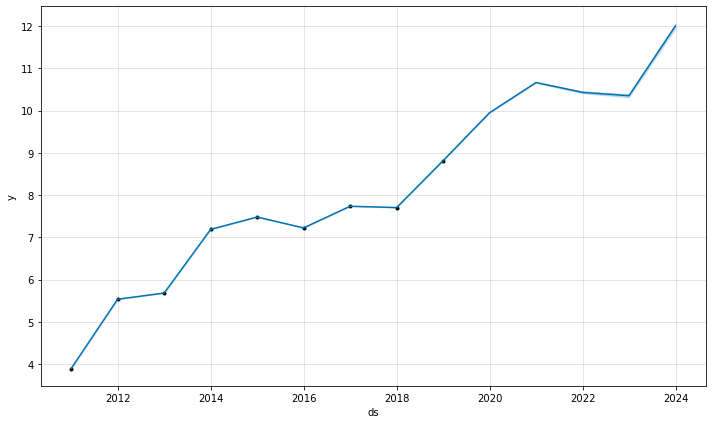

In [31]:
# Plot forecast

model.plot(forecast);

In [32]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [33]:
# Combine both dataframes

vis_df = raw_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,EV_PHEV,yhat,yhat_lower,yhat_upper
2011-01-01,49.0,3.891820,3.891820,3.891820
2012-01-01,253.0,5.533389,5.533389,5.533389
2013-01-01,293.0,5.680173,5.680173,5.680173
2014-01-01,1322.0,7.186901,7.186901,7.186901
2015-01-01,1771.0,7.479300,7.479300,7.479300


In [34]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,EV_PHEV,yhat,yhat_lower,yhat_upper,yhat_rescaled
2011-01-01,49.0,3.891820,3.891820,3.891820,49.0
2012-01-01,253.0,5.533389,5.533389,5.533389,253.0
2013-01-01,293.0,5.680173,5.680173,5.680173,293.0
2014-01-01,1322.0,7.186901,7.186901,7.186901,1322.0
2015-01-01,1771.0,7.479300,7.479300,7.479300,1771.0


<AxesSubplot:>

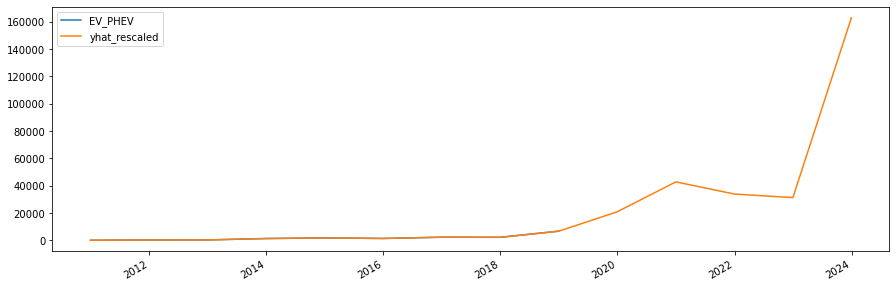

In [35]:
# Plot 'EV_PHEV' and 'yhat_rescaled'

vis_df[['EV_PHEV', 'yhat_rescaled']].plot()

In [36]:
# Ensure raw_df and model data are connected

raw_df.index = pd.to_datetime(raw_df.index) #make sure our index as a datetime object
connect_date = raw_df.index[-2] #select the 2nd to last date

In [37]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [38]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.111484,8.812546,8.812546,3.111484,3.111484,5.701061,5.701061,5.701061,7.458013,7.458013,...,0.001142,0.001142,0.001142,-1.758094,-1.758094,-1.758094,0.0,0.0,0.0,8.812546
2019-12-31,3.603654,9.943364,9.949737,3.600933,3.607306,6.342431,6.342431,6.342431,7.458013,7.458013,...,0.001142,0.001142,0.001142,-1.116725,-1.116725,-1.116725,0.0,0.0,0.0,9.946085
2020-12-31,4.098528,10.652683,10.676452,4.087630,4.111399,6.565052,6.565052,6.565052,7.458013,7.458013,...,0.643335,0.643335,0.643335,-1.536295,-1.536295,-1.536295,0.0,0.0,0.0,10.663581
2021-12-31,4.592050,10.407985,10.455838,4.569714,4.617568,5.838270,5.838270,5.838270,7.458013,7.458013,...,-0.212346,-0.212346,-0.212346,-1.407396,-1.407396,-1.407396,0.0,0.0,0.0,10.430320
2022-12-31,5.085572,10.315194,10.391091,5.050516,5.126413,5.264678,5.264678,5.264678,7.458013,7.458013,...,-0.926008,-0.926008,-0.926008,-1.267327,-1.267327,-1.267327,0.0,0.0,0.0,10.350250


In [39]:
# Create updated dataframe

vis_df = raw_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [40]:
# Preview head

vis_df.head()

,EV_PHEV,yhat,yhat_lower,yhat_upper,yhat_scaled
2011-01-01,49.0,NaN,NaN,NaN,NaN
2012-01-01,253.0,NaN,NaN,NaN,NaN
2013-01-01,293.0,NaN,NaN,NaN,NaN
2014-01-01,1322.0,NaN,NaN,NaN,NaN
2015-01-01,1771.0,NaN,NaN,NaN,NaN


In [41]:
# Preview tail

vis_df.tail()

,EV_PHEV,yhat,yhat_lower,yhat_upper,yhat_scaled
2019-12-31,NaN,9.946085,9.943364,9.949737,20870.347901
2020-12-31,NaN,10.663581,10.652683,10.676452,42769.503416
2021-12-31,NaN,10.430320,10.407985,10.455838,33871.198078
2022-12-31,NaN,10.350250,10.315194,10.391091,31264.863483
2023-12-31,NaN,12.000833,11.948866,12.057203,162890.375136


In [42]:
# Save dataframe as .csv

csv = vis_df.to_csv('electric_vehicles_forecasted.csv', index=True)

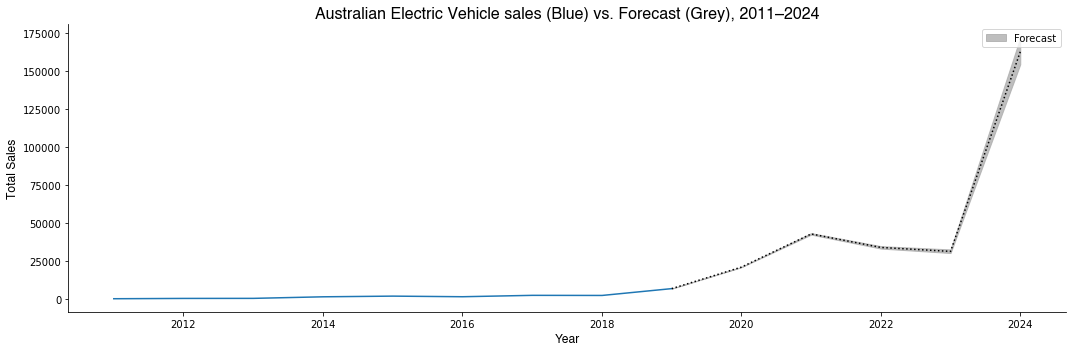

In [43]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.EV_PHEV)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Australian Electric Vehicle sales (Blue) vs. Forecast (Grey), 2011–2024', fontdict = font_1)
ax1.set_ylabel('Total Sales', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
#plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/electric_vehicles_sales_forecast.png", 
           #transparent=False, dpi=300)
plt.show()

In [28]:
# Save model
#import json
#from prophet.serialize import model_to_json, model_from_json

# Save
#with open('./electric_vehicle_model.json', 'w') as fout:
    #json.dump(model_to_json(model), fout)